In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [7]:
train.shape

(1460, 81)

In [8]:
#remove duplicates
train.drop_duplicates(inplace = True)

In [9]:
test.drop_duplicates(inplace = True)

In [10]:
train.shape

(1460, 81)

In [11]:
#remove null columns over a threshold
train.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
                 ...  
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
FireplaceQu       True
GarageType        True
GarageYrBlt       True
GarageFinish      True
GarageCars       False
GarageArea       False
GarageQual 

In [12]:
#train.isnull().sum()/train.shape[0]
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.shape[0]).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [13]:
thresh = len(train)*0.5
thresh

730.0

In [14]:
train.shape

(1460, 81)

In [15]:
test.shape

(1459, 80)

In [16]:
train.dropna(thresh = thresh, axis = 1, inplace = True)

In [17]:
train.shape

(1460, 77)

In [18]:
cols_diff=test.columns.difference(train.columns)


In [19]:
cols_diff

Index(['Alley', 'Fence', 'MiscFeature', 'PoolQC'], dtype='object')

In [20]:
test.drop(['Alley', 'Fence', 'MiscFeature', 'PoolQC'], axis = 1, inplace = True)

In [21]:
test.shape

(1459, 76)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 77 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [23]:
num_features = [col for col in train.columns if train[col].dtype in ['int64', 'float64'] and train[col].isnull().any() == True]

In [24]:
print(num_features)

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [25]:
train_dummy = train.copy()
train_dummy.drop(['SalePrice'], inplace = True, axis = 1)


In [26]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean', fill_value = 0)
train[num_features] = imputer.fit_transform(train_dummy[num_features])
test[num_features] = imputer.transform(test[num_features])

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 77 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [28]:
cat_features = [col for col in train.columns if train[col].dtype == 'object' and train[col].isnull().any() == True]

In [29]:
print(cat_features)

['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']


In [30]:
imputer_cat = SimpleImputer(strategy = 'most_frequent')
train[cat_features] = imputer_cat.fit_transform(train_dummy[cat_features])
test[cat_features] = imputer_cat.transform(test[cat_features])

In [31]:
test['MSZoning'].fillna(test['MSZoning'].value_counts().idxmax(), inplace = True)
test['Utilities'].fillna(test['Utilities'].value_counts().idxmax(), inplace = True)
test['Exterior1st'].fillna(test['Exterior1st'].value_counts().idxmax(), inplace = True)
test['Exterior2nd'].fillna(test['Exterior1st'].value_counts().idxmax(), inplace = True)
test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean(), inplace = True)
test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].mean(), inplace = True)
test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mean(), inplace = True)
test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean(), inplace = True)
test['BsmtFullBath'].fillna(test['BsmtFullBath'].mean(), inplace = True)
test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mean(), inplace = True)
test['KitchenQual'].fillna(test['KitchenQual'].value_counts().idxmax(), inplace = True)
test['Functional'].fillna(test['Functional'].value_counts().idxmax(), inplace = True)
test['GarageCars'].fillna(0, inplace = True)
test['GarageArea'].fillna(0, inplace = True)
test['SaleType'].fillna(test['SaleType'].value_counts().idxmax(), inplace = True)


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 77 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 76 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 non

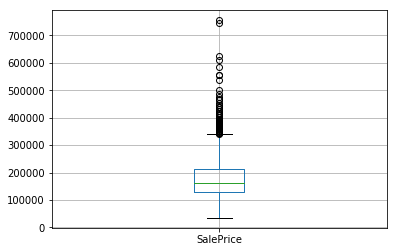

In [34]:
train.boxplot('SalePrice')

In [35]:
test.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
                 ...  
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
FireplaceQu      False
GarageType       False
GarageYrBlt

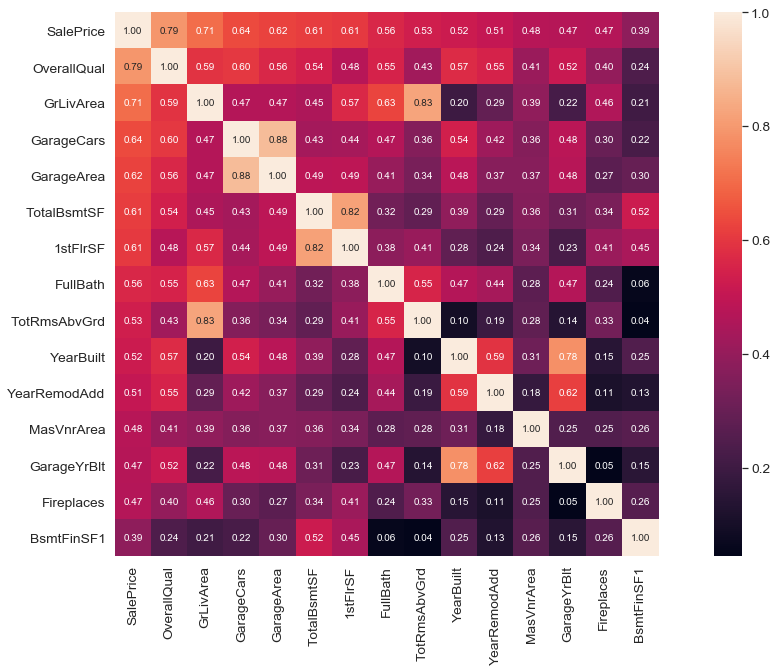

In [36]:
corrmat = train.corr()
plt.figure(figsize=(20,10))
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [37]:
#Feature engineering
train['YearRemodAdd Y/N'] = np.where(train['YearRemodAdd'] == train['YearBuilt'], 'No', 'Yes')
train['AgeWhenSold'] = (train['YearRemodAdd'] - train['YearBuilt'])
train['YearRemodAdd Y/N'] = train['YearRemodAdd Y/N'].astype('category')

test['YearRemodAdd Y/N'] = np.where(test['YearRemodAdd'] == test['YearBuilt'], 'No', 'Yes')
test['AgeWhenSold'] = (test['YearRemodAdd'] - test['YearBuilt'])
test['YearRemodAdd Y/N'] = test['YearRemodAdd Y/N'].astype('category')

train['TotSqFt'] = train['GrLivArea']+ train['TotalBsmtSF']+ train['1stFlrSF'] + train['2ndFlrSF']
train['TotBath'] = train['FullBath'] + 0.5*train['HalfBath'] + train['BsmtFullBath'] + 0.5*train['BsmtHalfBath']

test['TotSqFt'] = test['GrLivArea']+ test['TotalBsmtSF']+ test['1stFlrSF'] + test['2ndFlrSF']
test['TotBath'] = test['FullBath'] + 0.5*test['HalfBath'] + test['BsmtFullBath'] + 0.5*test['BsmtHalfBath']

In [38]:

#train['YearRemodAdd Y/N'] = np.where(train['YearRemodAdd'] == train['YearBuilt'], 'No', 'Yes')
#train['AgeWhenSold'] = (train['YearRemodAdd'] - train['YearBuilt'])
#train['YearRemodAdd Y/N'] = train['YearRemodAdd Y/N'].astype('category')

#train['TotSqFt'] = train['GrLivArea']+ train['TotalBsmtSF']+ train['1stFlrSF'] + train['2ndFlrSF']
#train['TotBath'] = train['FullBath'] + 0.5*train['HalfBath'] + train['BsmtFullBath'] + 0.5*train['BsmtHalfBath']

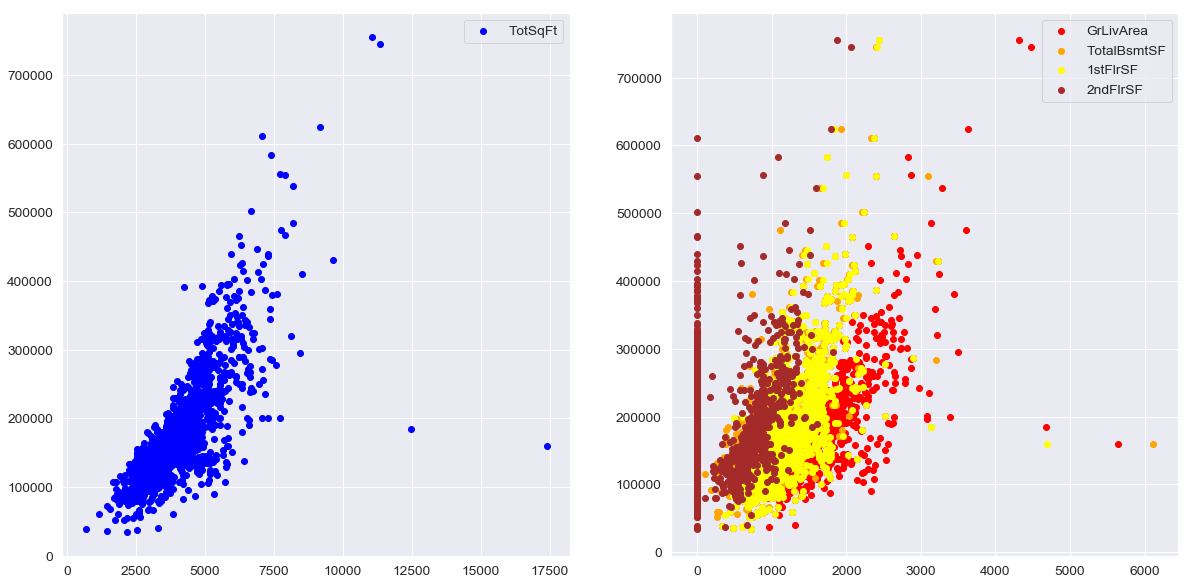

In [39]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(train['TotSqFt'], train['SalePrice'], color = 'Blue', label = 'TotSqFt')
ax2.scatter(train['GrLivArea'], train['SalePrice'], color = 'Red', label = 'GrLivArea')
ax2.scatter(train['TotalBsmtSF'], train['SalePrice'], color = 'Orange', label = 'TotalBsmtSF')
ax2.scatter(train['1stFlrSF'], train['SalePrice'], color = 'Yellow', label = '1stFlrSF' )
ax2.scatter(train['2ndFlrSF'], train['SalePrice'], color = 'Brown', label = '2ndFlrSF')
ax1.legend()
ax2.legend()
plt.show()

In [40]:
Garageyear_diff = ((train['YearBuilt'] - train['GarageYrBlt']) != 0).value_counts()
print(Garageyear_diff)

False    1089
True      371
dtype: int64


In [41]:
cols_2_remove = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'YearRemodAdd', 'YearBuilt', 'Id', 'YrSold', 'FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','GarageYrBlt', 'GarageCars']
train_rem = train.copy()
test_rem = test.copy()
train_rem.drop(cols_2_remove, axis = 1, inplace = True)
test_rem.drop(cols_2_remove, axis = 1, inplace = True)

In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id                  1459 non-null int64
MSSubClass          1459 non-null int64
MSZoning            1459 non-null object
LotFrontage         1459 non-null float64
LotArea             1459 non-null int64
Street              1459 non-null object
LotShape            1459 non-null object
LandContour         1459 non-null object
Utilities           1459 non-null object
LotConfig           1459 non-null object
LandSlope           1459 non-null object
Neighborhood        1459 non-null object
Condition1          1459 non-null object
Condition2          1459 non-null object
BldgType            1459 non-null object
HouseStyle          1459 non-null object
OverallQual         1459 non-null int64
OverallCond         1459 non-null int64
YearBuilt           1459 non-null int64
YearRemodAdd        1459 non-null int64
RoofStyle           1459 non-null object
RoofMatl            1459 non-null obje

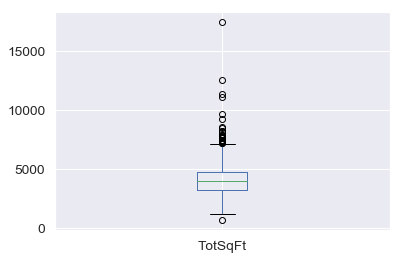

In [43]:
train_rem.boxplot('TotSqFt')

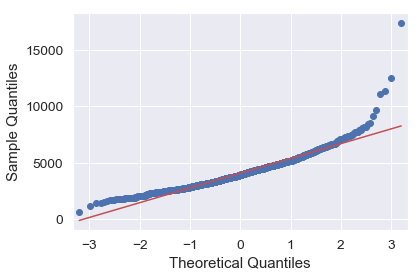

In [44]:
# Building normality plots
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
qqplot(train_rem['TotSqFt'], line = 's')
pyplot.show()

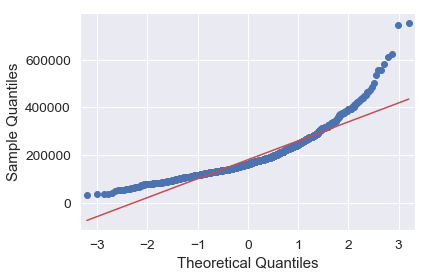

In [45]:
qqplot(train_rem['SalePrice'], line = 's')
pyplot.show()

In [46]:
train_rem.drop(train_rem[train_rem.TotSqFt > 9000].index, inplace = True)
train_rem.drop(train_rem[train_rem.TotSqFt < 2000].index, inplace = True)
train_rem.drop(train_rem[train_rem.SalePrice < 50000].index, inplace = True)
train_rem.drop(train_rem[train_rem.SalePrice > 600000].index, inplace = True)

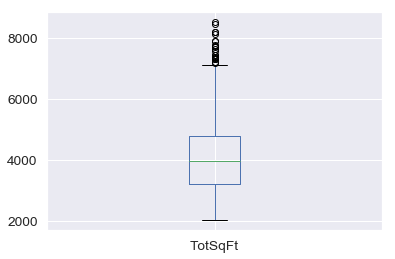

In [47]:
train_rem.boxplot('TotSqFt')

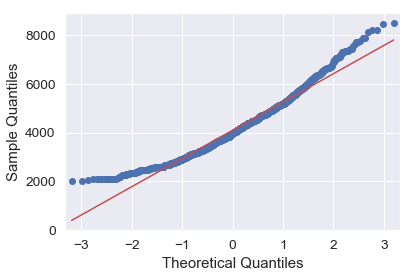

In [48]:
qqplot(train_rem['TotSqFt'], line = 's')
pyplot.show()

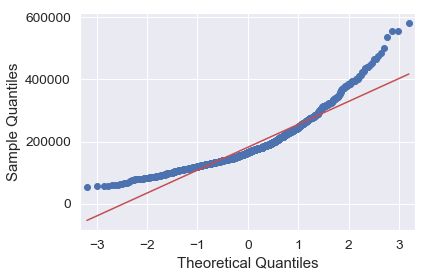

In [49]:
qqplot(train_rem['SalePrice'], line = 's')
pyplot.show()

In [50]:
train_rem.shape

(1423, 67)

In [51]:
for i in train_rem.select_dtypes(include = 'object').columns:
    train_rem[i] = train_rem[i].astype('category')


In [52]:
cat_cols = train.select_dtypes(include = 'category').columns.tolist()

In [53]:
#data_outliers.boxplot('TotSqFt')
train_rem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1423 entries, 0 to 1459
Data columns (total 67 columns):
MSSubClass          1423 non-null int64
MSZoning            1423 non-null category
LotFrontage         1423 non-null float64
LotArea             1423 non-null int64
Street              1423 non-null category
LotShape            1423 non-null category
LandContour         1423 non-null category
Utilities           1423 non-null category
LotConfig           1423 non-null category
LandSlope           1423 non-null category
Neighborhood        1423 non-null category
Condition1          1423 non-null category
Condition2          1423 non-null category
BldgType            1423 non-null category
HouseStyle          1423 non-null category
OverallQual         1423 non-null int64
OverallCond         1423 non-null int64
RoofStyle           1423 non-null category
RoofMatl            1423 non-null category
Exterior1st         1423 non-null category
Exterior2nd         1423 non-null category
Mas

In [54]:
train_1 = train_rem.copy()
#train_1.drop(labels = 'SalePrice', axis = 1, inplace = True)
train_1['Status'] = 1
test_1 = test_rem.copy()
test_1['Status'] = 0
combo = train_1.copy()
combo = combo.append(test_1)

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [55]:
combo.shape

(2882, 68)

In [56]:
combo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2882 entries, 0 to 1458
Data columns (total 68 columns):
3SsnPorch           2882 non-null int64
AgeWhenSold         2882 non-null int64
BedroomAbvGr        2882 non-null int64
BldgType            2882 non-null object
BsmtCond            2882 non-null object
BsmtExposure        2882 non-null object
BsmtFinSF1          2882 non-null float64
BsmtFinSF2          2882 non-null float64
BsmtFinType1        2882 non-null object
BsmtFinType2        2882 non-null object
BsmtQual            2882 non-null object
BsmtUnfSF           2882 non-null float64
CentralAir          2882 non-null object
Condition1          2882 non-null object
Condition2          2882 non-null object
Electrical          2882 non-null object
EnclosedPorch       2882 non-null int64
ExterCond           2882 non-null object
ExterQual           2882 non-null object
Exterior1st         2882 non-null object
Exterior2nd         2882 non-null object
FireplaceQu         2882 non-null

In [57]:
for i in combo.select_dtypes(include = 'object').columns:
    combo[i] = combo[i].astype('category')

In [58]:
all_data = combo.copy()

In [59]:
all_data_cat_cols = all_data.select_dtypes(include = 'category').columns
all_data_num_cols = all_data.select_dtypes(exclude = 'category').columns

In [60]:
#all_data_cat = all_data_cat_cols.drop('Status')
cols_for_scaling = all_data_num_cols.drop('Status')


In [61]:
#st = all_data.Status

In [62]:
#type(st)

In [63]:
#cols_for_scaling = [all_data_num_cols - st]

In [64]:
all_dummies = pd.get_dummies(all_data[all_data.columns])

In [65]:
X_train = all_dummies[all_dummies.Status == 1].drop(['Status'], axis = 1)
X_test = all_dummies[all_dummies.Status == 0].drop(['Status'], axis = 1)

In [66]:
#all_dummies.drop('Status', axis = 1, inplace = True)

In [67]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1423 entries, 0 to 1459
Columns: 266 entries, 3SsnPorch to YearRemodAdd Y/N_Yes
dtypes: float64(9), int64(18), uint8(239)
memory usage: 643.4 KB


In [68]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Columns: 266 entries, 3SsnPorch to YearRemodAdd Y/N_Yes
dtypes: float64(9), int64(18), uint8(239)
memory usage: 659.7 KB


In [69]:
all_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2882 entries, 0 to 1458
Columns: 267 entries, 3SsnPorch to YearRemodAdd Y/N_Yes
dtypes: float64(9), int64(19), uint8(239)
memory usage: 1.3 MB


In [70]:
print(all_dummies.columns.difference(X_test.columns))


Index(['Status'], dtype='object')


In [71]:
y = train_rem['SalePrice']

In [72]:
scaler = StandardScaler()
dummies_scaled = all_dummies.copy()
dummies_scaled[cols_for_scaling] = scaler.fit_transform(dummies_scaled[cols_for_scaling])
train_scaled = dummies_scaled[dummies_scaled.Status == 1].drop(['Status'], axis =1)
test_scaled = dummies_scaled[dummies_scaled.Status == 0].drop(['Status'], axis =1)
y_scaled = all_data[all_data.Status == 1].Status

In [73]:
#all_dummies.drop('Status', axis = 1, inplace = True)

In [74]:
dummies_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2882 entries, 0 to 1458
Columns: 267 entries, 3SsnPorch to YearRemodAdd Y/N_Yes
dtypes: float64(27), int64(1), uint8(239)
memory usage: 1.3 MB


In [75]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1423 entries, 0 to 1459
Columns: 266 entries, 3SsnPorch to YearRemodAdd Y/N_Yes
dtypes: float64(9), int64(18), uint8(239)
memory usage: 643.4 KB


In [76]:
len(y)

1423

In [77]:
len(train_scaled)

1423

In [78]:
test_scaled.isnull().any()

3SsnPorch                False
AgeWhenSold              False
BedroomAbvGr             False
BsmtFinSF1               False
BsmtFinSF2               False
BsmtUnfSF                False
EnclosedPorch            False
Fireplaces               False
GarageArea               False
KitchenAbvGr             False
LotArea                  False
LotFrontage              False
LowQualFinSF             False
MSSubClass               False
MasVnrArea               False
MiscVal                  False
MoSold                   False
OpenPorchSF              False
OverallCond              False
OverallQual              False
PoolArea                 False
SalePrice                 True
ScreenPorch              False
TotBath                  False
TotRmsAbvGrd             False
TotSqFt                  False
WoodDeckSF               False
BldgType_1Fam            False
BldgType_2fmCon          False
BldgType_Duplex          False
                         ...  
RoofMatl_Tar&Grv         False
RoofMatl

In [79]:
test_scaled.drop('SalePrice', axis  = 1, inplace = True)
train_scaled.drop('SalePrice', axis  = 1, inplace = True)

In [80]:
train_scaled.columns

Index(['3SsnPorch', 'AgeWhenSold', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'GarageArea',
       'KitchenAbvGr',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'Street_Grvl', 'Street_Pave', 'Utilities_AllPub', 'Utilities_NoSeWa',
       'YearRemodAdd Y/N_No', 'YearRemodAdd Y/N_Yes'],
      dtype='object', length=265)

In [81]:
train_scaled.SalePrice

AttributeError: 'DataFrame' object has no attribute 'SalePrice'

In [93]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

In [94]:
dt = tree.DecisionTreeRegressor(random_state = 1)
cv = cross_val_score(dt,X_train,y,cv=5)
print(cv)
print(cv.mean())

[0.99872439 0.99495043 0.99775991 0.99966809 0.99798469]
0.9978175026266619


In [95]:
dt = tree.DecisionTreeRegressor(random_state = 1)
cv = cross_val_score(dt,train_scaled,y,cv=5)
print(cv)
print(cv.mean())

[0.72966877 0.74360895 0.7481119  0.72602114 0.6902778 ]
0.7275377121531378


In [96]:
#dt = tree.DecisionTreeRegressor(random_state = 1)
#cv = cross_val_score(dt,train_scaled,y,cv=5)
#print(cv)
#print(cv.mean())

In [97]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y,cv=5)
print(cv)
print(cv.mean())

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[0.24561404 0.23508772 0.22105263 0.20422535 0.23239437]
0.22767482085495425


In [98]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,train_scaled,y,cv=5)
print(cv)
print(cv.mean())

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[0.01403509 0.00701754 0.00350877 0.00704225 0.00704225]
0.007729182110205089


In [99]:
rf = RandomForestRegressor(random_state = 1)
cv = cross_val_score(rf,X_train,y,cv=5)
print(cv)
print(cv.mean())

[0.99917743 0.99911589 0.99680133 0.99901871 0.99956145]
0.9987349613115406


In [100]:
rf = RandomForestRegressor(random_state = 1)
cv = cross_val_score(rf,train_scaled,y,cv=5)
print(cv)
print(cv.mean())

[0.88852049 0.91139216 0.87295712 0.89179276 0.87322947]
0.887578400660557


In [101]:
lasso = Lasso()
cv = cross_val_score(lasso,X_train,y,cv=5)
print(cv)
print(cv.mean())

[1. 1. 1. 1. 1.]
0.9999999999992685


In [102]:
lasso = Lasso()
cv = cross_val_score(lasso,train_scaled,y,cv=5)
print(cv)
print(cv.mean())

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2939299849.335083, tolerance: 594808715.7854471
  positive)


[0.89155661 0.90494091 0.88807652 0.88619752 0.89204061]
0.8925624348444703


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 974684027.7227173, tolerance: 636945493.4176567
  positive)


In [103]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state =1)
cv = cross_val_score(xgb,train_scaled,y,cv=5)
print(cv)
print(cv.mean())

C:\Users\USER\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:41:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\USER\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:41:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\USER\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:41:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\USER\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:42:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\USER\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:42:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0.91346975 0.92454979 0.89693485 0.9196747  0.89513977]
0.9099537732176053


In [104]:
from sklearn.ensemble import VotingRegressor
voting_rgr = VotingRegressor(estimators = [('dt', dt), ('rf', rf), ('lasso', lasso), ('xgb', xgb)])
cv = cross_val_score(voting_rgr, train_scaled, y, cv = 5)
print(cv)
print(cv.mean())

[14:42:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:42:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2939299849.335083, tolerance: 594808715.7854471
  positive)


[14:42:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:42:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 974684027.7227173, tolerance: 636945493.4176567
  positive)


[14:42:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0.90879663 0.91838754 0.8905301  0.90258448 0.88985553]
0.9020308577063968


In [105]:
voting_rgr.fit(train_scaled, y)
y_base_predicted = voting_rgr.predict(test_scaled).astype(int)
base_submission_data = {'Id' : test.Id, 'SalePrice' : y_base_predicted}
base_submission = pd.DataFrame(data = base_submission_data)
base_submission.to_csv('base_submission.csv', index = False)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6178105806.520569, tolerance: 777035836.2631328
  positive)


[14:42:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [106]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 
def rgr_performance(Regressor, model_name):
    print(model_name)
    print("Best score" + str(Regressor.best_score_))
    print("Best parameter" + str(Regressor.best_params_))

In [107]:
dr = tree.DecisionTreeRegressor()
param_grid = {'criterion' : ['mse', 'friedman_mse', 'mae', 'poisson'],
              'splitter' : ['best', 'random'],
              'max_depth' : [10, 20, 40, 60, 100, 250, 500],
              'max_leaf_nodes' : [15, 30, 40, 50, 100, 200, 500]}
rgr_dt = GridSearchCV(dr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_rgr_dt = rgr_dt.fit(train_scaled, y)
rgr_performance(best_rgr_dt, 'Decision Tree Regressor') 

Fitting 5 folds for each of 392 candidates, totalling 1960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 344 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 844 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 1276 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1960 out of 1960 | elapsed:  3.5min finished


Decision Tree Regressor
Best score0.8062292619870256
Best parameter{'criterion': 'mae', 'max_depth': 250, 'max_leaf_nodes': 40, 'splitter': 'best'}


In [108]:
dr = tree.DecisionTreeRegressor()
param_grid = {'criterion' : ['mse', 'friedman_mse', 'mae', 'poisson'],
              'splitter' : ['best', 'random'],
              'max_depth' : [30, 35, 40, 45, 50, 55],
              'max_leaf_nodes' : [35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]}
rgr_dt = GridSearchCV(dr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_rgr_dt = rgr_dt.fit(train_scaled, y)
rgr_performance(best_rgr_dt, 'Decision Tree Regressor') 

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 348 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 848 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 1508 tasks      | elapsed:   55.4s
[Parallel(n_jobs=-1)]: Done 1958 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  4.7min finished


Decision Tree Regressor
Best score0.8081412915948512
Best parameter{'criterion': 'mae', 'max_depth': 40, 'max_leaf_nodes': 39, 'splitter': 'best'}


In [109]:
rf = RandomForestRegressor()
param_grid = {
              'criterion' : ['mse', 'mae'],
              'max_depth' : [10, 20, 40, 60, 100, 250, 500], 
              'max_features' : ['auto', 'sqrt', 'log2', 'int', 'float']}
rgr_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_rgr_rf = rgr_rf.fit(train_scaled, y)
rgr_performance(best_rgr_rf, 'Random Forest Regressor')

Fitting 5 folds for each of 70 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed: 16.8min finished


Random Forest Regressor
Best score0.8876700631199554
Best parameter{'criterion': 'mse', 'max_depth': 60, 'max_features': 'auto'}


In [115]:
lasso = Lasso()
param_grid = {'alpha' : [1.0, 3.0, 5.0, 7.0, 9.0, 10.0],
             'fit_intercept' : [True, False],
             'selection'  :['cyclic', 'random']}
rgr_lasso = GridSearchCV(lasso, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_rgr_lasso = rgr_lasso.fit(train_scaled, y)
rgr_performance(best_rgr_lasso, 'Lasso')

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   33.8s finished


Lasso
Best score0.8957620222405425
Best parameter{'alpha': 10.0, 'fit_intercept': False, 'selection': 'cyclic'}


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 139886590146.90814, tolerance: 5467534515.5968
  positive)


In [110]:
xgb = XGBRegressor()
param_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear', 'reg:squarederror', 'reg:squaredlogerror', ],
              'learning_rate': [.03, 0.05, .07, 1, 0.9, 0.1, 0.01], #so called `eta` value
              'max_depth': [5, 15,30, 50, 100, 500, 250],
              'silent': [1]}
rgr_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_rgr_xgb = rgr_xgb.fit(train_scaled, y)
rgr_performance(best_rgr_xgb, 'XGB Regressor')

Fitting 5 folds for each of 147 candidates, totalling 735 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 735 out of 735 | elapsed: 19.9min finished
C:\Users\USER\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\USER\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGB Regressor
Best score0.9033903491814886
Best parameter{'learning_rate': 0.07, 'max_depth': 5, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1}


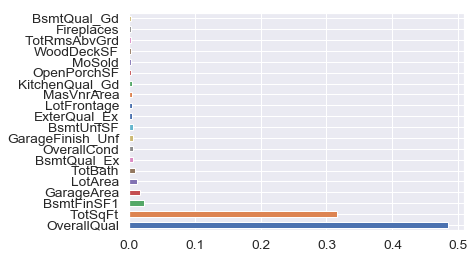

In [112]:
best_rf = best_rgr_rf.best_estimator_.fit(train_scaled, y)
feat_importances = pd. Series(best_rf.feature_importances_, index = train_scaled.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [116]:
#Model Additional Ensemble Approaches
best_dt = best_rgr_dt.best_estimator_
best_rf = best_rgr_rf.best_estimator_
best_lasso = best_rgr_lasso.best_estimator_
best_xgb = best_rgr_xgb.best_estimator_

In [121]:
voting_rgr_final = VotingRegressor(estimators = [('dt', best_dt), ('rf', best_rf), ('lasso', best_lasso), ('xgb', best_xgb)])
print('voting_rgr_final :', cross_val_score(voting_rgr_final, X_train, y, cv = 5))
print('voting_rgr_final_mean :', cross_val_score(voting_rgr_final, X_train, y, cv = 5).mean())
print('voting_rgr_final scaled :', cross_val_score(voting_rgr_final, train_scaled, y, cv = 5))
print('voting_rgr_final scaled mean:', cross_val_score(voting_rgr_final, train_scaled, y, cv = 5).mean())


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7286032848.643652, tolerance: 4353476955.8086
  positive)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7535183575.695783, tolerance: 4314892678.9791
  positive)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7273241139.537463, tolerance: 4312537835.8858
  positive)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 734980

voting_rgr_final : [0.99940089 0.99961583 0.99898153 0.99966623 0.99949943]


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7286032848.643652, tolerance: 4353476955.8086
  positive)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7535183575.695783, tolerance: 4314892678.9791
  positive)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7273241139.537463, tolerance: 4312537835.8858
  positive)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 734980

voting_rgr_final_mean : 0.9994213745379895


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109451373799.28247, tolerance: 4353476955.8086
  positive)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105044297255.72995, tolerance: 4314892678.9791
  positive)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99828323763.5975, tolerance: 4312537835.8858
  positive)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11200

voting_rgr_final scaled : [0.9164929  0.92049844 0.88956397 0.91572394 0.89743589]


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109451373799.28247, tolerance: 4353476955.8086
  positive)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105044297255.72995, tolerance: 4314892678.9791
  positive)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99828323763.5975, tolerance: 4312537835.8858
  positive)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11200

voting_rgr_final scaled mean: 0.9081288312494097


In [122]:
voting_rgr_final.fit(train_scaled, y)


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 139886590146.90814, tolerance: 5467534515.5968
  positive)


VotingRegressor(estimators=[('dt',
                             DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mae',
                                                   max_depth=40,
                                                   max_features=None,
                                                   max_leaf_nodes=39,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best')),
                            ('rf',


In [123]:
predicton = voting_rgr_final.predict(test_scaled).astype(int)

In [129]:
final_data = {'Id': test.Id, 'SalePrice': predicton}
submission = pd.DataFrame(data=final_data)

In [130]:
submission.to_csv('submission_final.csv', index =False)

ModuleNotFoundError: No module named 'cv2'